##  classification of mushrooms as edible vs poisonous



In [1]:
%reset -fs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [3]:
#read data from excel file
df = pd.read_excel('mushrooms2.xlsx')
df

,edible_poison,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [4]:
#take a look at feature columns
df.columns

Index(['edible_poison', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [5]:
#check all unique values in dataframe
np.unique(df.values)


array(['ABUNDANT', 'ALMOND', 'ANISE', 'ATTACHED', 'BELL', 'BLACK',
       'BROAD', 'BROWN', 'BRUISES', 'BUFF', 'CHOCOLATE', 'CINNAMON',
       'CLOSE', 'CLUSTERED', 'CONICAL', 'CONVEX', 'CREOSOTE', 'CROWDED',
       'EDIBLE', 'ENLARGING', 'EVANESCENT', 'FIBROUS', 'FISHY', 'FLARING',
       'FLAT', 'FOUL', 'FREE', 'GRASSES', 'GRAY', 'GREEN', 'GROOVES',
       'KNOBBED', 'LARGE', 'LEAVES', 'MEADOWS', 'MUSTY', 'NARROW', 'NO',
       'NONE', 'NUMEROUS', 'ONE', 'ORANGE', 'PARTIAL', 'PATHS', 'PENDANT',
       'PINK', 'POISONOUS', 'PUNGENT', 'PURPLE', 'RED', 'SCALY',
       'SCATTERED', 'SEVERAL', 'SILKY', 'SMOOTH', 'SOLITARY', 'SPICY',
       'SUNKEN', 'TAPERING', 'TWO', 'URBAN', 'WASTE', 'WHITE', 'WOODS',
       'YELLOW'], dtype=object)

In [6]:
#examine unique labels of each feature and create a dictionary of each feature as key and it's unique
#labels as values in the form of a np array

df['odor'].unique()
df['stalk-surface-below-ring'].unique()
df['spore-print-color'].unique()

dict_uniques = {}
for col in df.columns:
    dict_uniques[col] = df[col].unique()


dict_uniques['odor']
  

array(['ALMOND', 'ANISE', 'NONE', 'PUNGENT', 'CREOSOTE', 'FOUL', 'FISHY',
       'SPICY', 'MUSTY'], dtype=object)

In [7]:
#check for duplicates
sum(df.duplicated())

292

In [8]:
#drop duplicates
df = df.drop_duplicates()
df.shape

(8124, 22)

In [9]:
"""
I had orgianlly used dummy variables for my analysis but this resulted in nonsensical results of a 
perfect model when used with a logistic regression model. So after some research, I converted may feature 
labels to ordinal. This seems to work better.
"""
# df_dummies = pd.get_dummies(df, drop_first = True)
# df_dummies.head()

'\nI had orgianlly used dummy variables for my analysis but this resulted in nonsensical results of a \nperfect model when used with a logistic regression model. So after some research, I converted may feature \nlabels to ordinal. This seems to work better.\n'

In [10]:
#recast my data as categorical
df_ordinal = df.copy()
df_ordinal = df.astype('category')

In [12]:
#convert data to ordinal and create a dictionary to preserve the mapping of labels to ordinal values
#I obtained code for extracting label mapping into a dictionary from stack over flow
labels_dict = {}

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns: 
    df_ordinal[column] = le.fit_transform(df[column])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #I obtianed parts of this code
    labels_dict[column] = le_name_mapping

df_ordinal

,edible_poison,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,0,4,3,0,1,6,0,0,0,1,...,3,4,4,0,0,1,4,1,1,1
8412,0,4,3,0,1,6,0,0,0,1,...,3,4,4,0,0,1,4,5,4,1
8413,0,4,3,0,1,6,0,0,0,1,...,3,4,4,0,0,1,4,5,1,1
8414,0,4,3,0,1,6,0,0,0,1,...,3,4,4,0,0,1,4,2,4,1


In [13]:
print(le.classes_)


['GRASSES' 'LEAVES' 'MEADOWS' 'PATHS' 'URBAN' 'WASTE' 'WOODS']


In [14]:
# check the label mapping dictionary
labels_dict

{'edible_poison': {'EDIBLE': 0, 'POISONOUS': 1},
 'cap-shape': {'BELL': 0,
  'CONICAL': 1,
  'CONVEX': 2,
  'FLAT': 3,
  'KNOBBED': 4,
  'SUNKEN': 5},
 'cap-surface': {'FIBROUS': 0, 'GROOVES': 1, 'SCALY': 2, 'SMOOTH': 3},
 'cap-color': {'BROWN': 0,
  'BUFF': 1,
  'CINNAMON': 2,
  'GRAY': 3,
  'GREEN': 4,
  'PINK': 5,
  'PURPLE': 6,
  'RED': 7,
  'WHITE': 8,
  'YELLOW': 9},
 'bruises?': {'BRUISES': 0, 'NO': 1},
 'odor': {'ALMOND': 0,
  'ANISE': 1,
  'CREOSOTE': 2,
  'FISHY': 3,
  'FOUL': 4,
  'MUSTY': 5,
  'NONE': 6,
  'PUNGENT': 7,
  'SPICY': 8},
 'gill-attachment': {'ATTACHED': 0, 'FREE': 1},
 'gill-spacing': {'CLOSE': 0, 'CROWDED': 1},
 'gill-size': {'BROAD': 0, 'NARROW': 1},
 'gill-color': {'BLACK': 0,
  'BROWN': 1,
  'BUFF': 2,
  'CHOCOLATE': 3,
  'GRAY': 4,
  'GREEN': 5,
  'ORANGE': 6,
  'PINK': 7,
  'PURPLE': 8,
  'RED': 9,
  'WHITE': 10,
  'YELLOW': 11},
 'stalk-shape': {'ENLARGING': 0, 'TAPERING': 1},
 'stalk-surface-above-ring': {'FIBROUS': 0,
  'SCALY': 1,
  'SILKY': 2,
  'SM

In [15]:
#Export ordinal datframe to csv
df_ordinal.to_csv('mush_data', index=False)

In [16]:
#select feature columns and place in dataframe
df_feature_cols = df_ordinal.iloc[:, 1:]

#select target variable and place in data frame
df_target = df_ordinal[['edible_poison']]
# print(df_feature_cols)
df_target.head()
df_feature_cols.shape

(8124, 21)

In [19]:
# Perform a chi2 test on the features to check whether features have predictive value. They do! Almost
#abnormaly so

from sklearn.feature_selection import SelectKBest, chi2

X = df_feature_cols.iloc[:,1:].values
y = df_target.values

p_values = chi2(X,y)[1]
p_values_under05 = p_values[np.where(p_values<=.05)]
p_values_under05.shape

p_values_0 = p_values[np.where(p_values <= 0.01)]
p_values_0.shape

(17,)

In [20]:
#check for target data imbalance. No issue

tot_poison = int(df_target.sum())
tot_edible = df_target.shape[0] - tot_poison
print('total poison = ', tot_poison)
print('total edible = ', tot_edible)

total poison =  3916
total edible =  4208


In [21]:
# As a preliminary test, run a chi square test and take a look at the 'best' features

X = df_feature_cols
y = df_target

chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)
X_kbest_features

array([[1, 4, 6],
       [1, 4, 1],
       [1, 4, 6],
       ...,
       [0, 4, 5],
       [0, 4, 2],
       [0, 4, 2]])

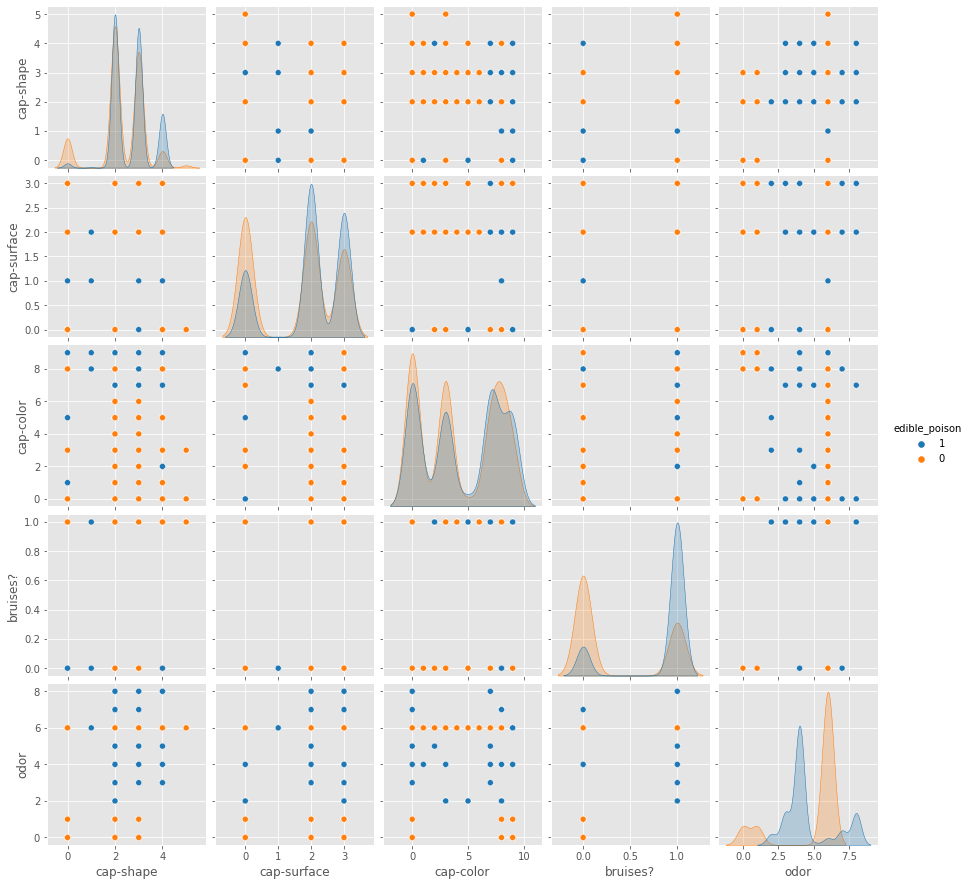

In [22]:
# pair plots
sns.pairplot(df_ordinal, vars = df_ordinal.columns[1:6], hue ="edible_poison",
             hue_order = [1, 0], palette = 'tab10')

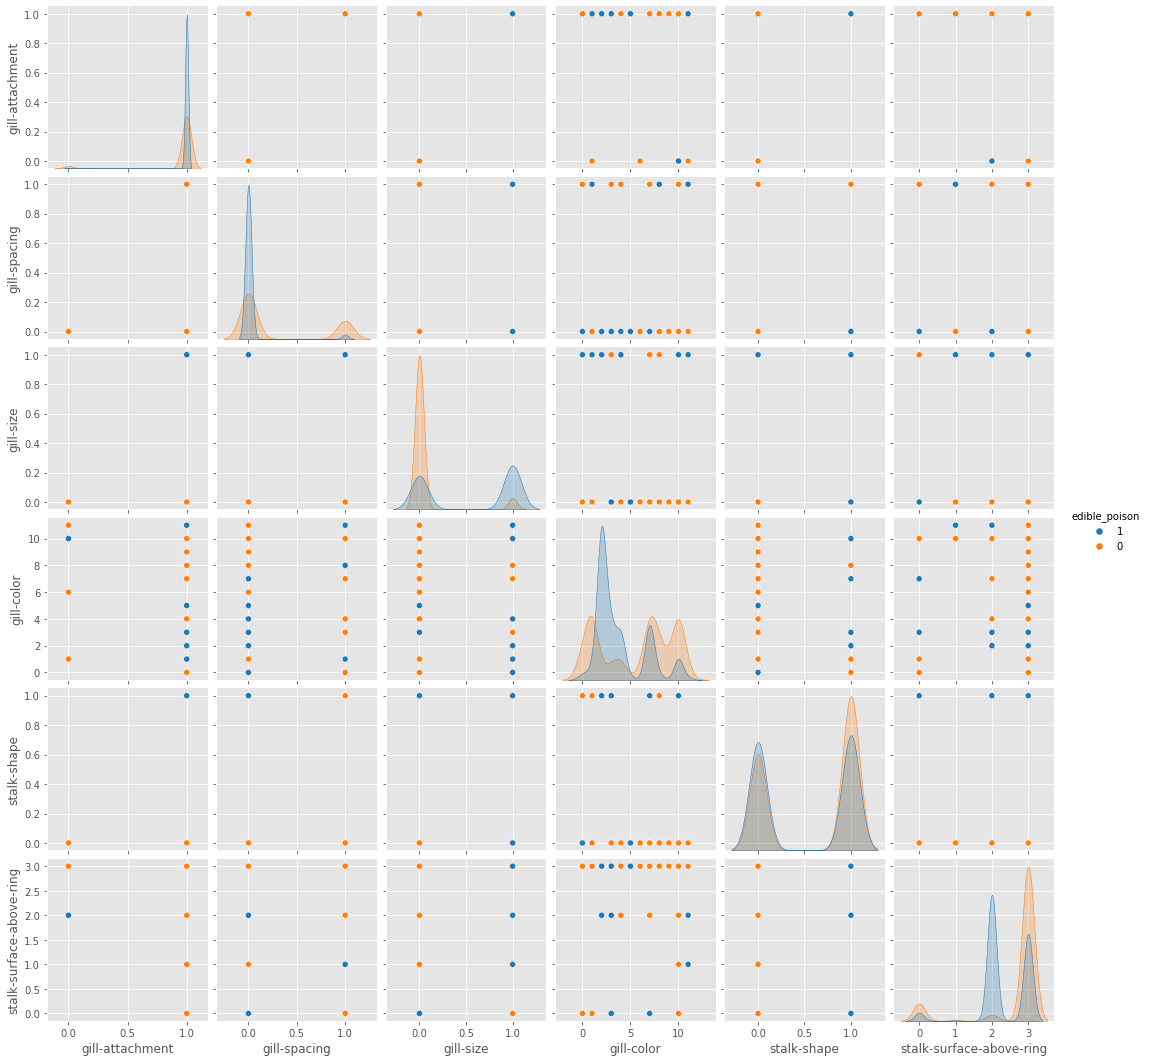

In [23]:
sns.pairplot(df_ordinal, vars = df_ordinal.columns[6:12], hue ="edible_poison", hue_order = [1, 0], palette = 'tab10')

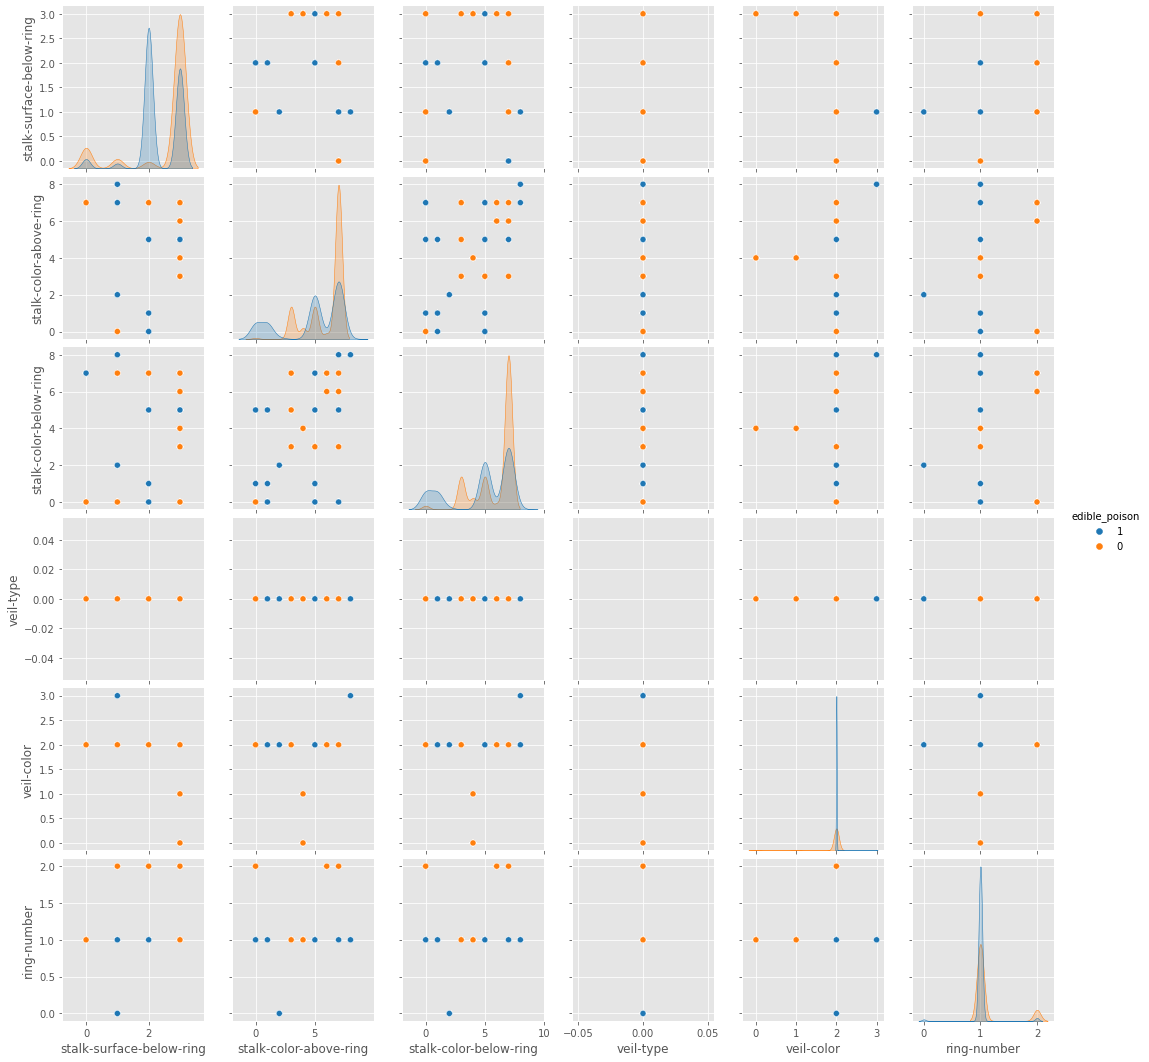

In [24]:
sns.pairplot(df_ordinal, vars = df_ordinal.columns[12:18], hue ="edible_poison", hue_order = [1, 0], palette = 'tab10')

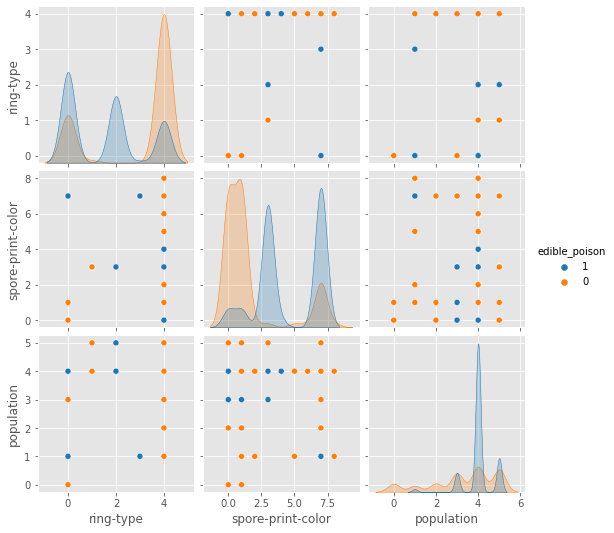

In [25]:
sns.pairplot(df_ordinal, vars = df_ordinal.columns[18:21], hue ="edible_poison", hue_order = [1, 0], palette = 'tab10')

In [27]:
#define X and y variables for test/train split and analysis
#I am not scaling the data since all my features have been converted to dummy variables with values 0 or 1

X = df_feature_cols
y = df_target

In [28]:
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2227,2,0,3,0,6,1,0,0,7,1,...,3,5,7,0,2,1,4,1,4,6
6934,3,3,0,1,8,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,6
5886,2,3,1,0,6,1,0,0,9,0,...,3,6,7,0,2,2,0,7,1,5
3588,3,2,3,0,6,1,0,0,1,1,...,3,7,3,0,2,1,4,0,5,6
7268,4,3,7,1,4,1,0,1,2,1,...,2,7,7,0,2,1,0,7,4,1


In [29]:
#instantiate logistic model and fit
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [30]:
#run prediction.
#I tinkered with this the decision threshold after genera ROC curve
th = .42
y_pred = lr.predict(X_test)
y_pred_prob =(lr.predict_proba(X_test)[:,1] > th)

print(y_pred)
print(y_pred_prob)


[0 1 0 ... 1 1 0]
[False  True False ...  True  True False]


In [31]:
print(lr.predict_proba(X_test)[:,1])

[0.0157516  0.98021132 0.02790114 ... 0.92146978 0.99172805 0.05813525]


In [32]:
#Base score
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9415384615384615


In [31]:
from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred_prob))

1.8491765704823877


In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[826  39]
 [ 56 704]]


In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,  output_dict=True)
report['macro avg']['f1-score']


0.941207072593984

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       865
           1       0.95      0.93      0.94       760

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



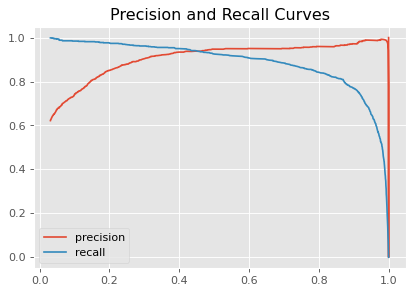

In [33]:
#precision curve
#code from multiple sources

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
# plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

ROC AUC score =  0.9787587465774261


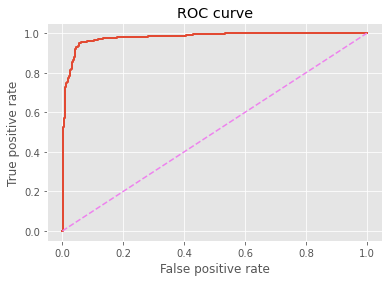

In [36]:
#ROC curve
#code from multiple sources

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [38]:
#log loss for each feature

from sklearn.metrics import log_loss
for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train.values.ravel())
    y_pred_proba_col = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_pred_proba_col))

cap-shape
0.6707743572524
cap-surface
0.6795127075782108
cap-color
0.6905721188392793
bruises?
0.5494394536989106
odor
0.691839571215861
gill-attachment
0.6824195462240201
gill-spacing
0.6178796549388824
gill-size
0.5391049427276488
gill-color
0.6521321365250674
stalk-shape
0.6848596355617812
stalk-surface-above-ring
0.6764542953694427
stalk-surface-below-ring
0.6843503206315406
stalk-color-above-ring
0.6453595130637231
stalk-color-below-ring
0.6559678661732816
veil-type
0.6917015794040134
veil-color
0.6767372001743635
ring-number
0.6626670825180582
ring-type
0.6071442809451932
spore-print-color
0.5525456700385281
population
0.6412623498400237
habitat
0.6914052556549647


In [39]:
#Run  each feature through logistic regression

for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train.values.ravel())
    y_pred_col = lr_model.predict(X_te)
    print(classification_report(y_test, y_pred_col))

cap-shape
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       865
           1       0.52      0.56      0.54       760

    accuracy                           0.56      1625
   macro avg       0.56      0.56      0.55      1625
weighted avg       0.56      0.56      0.56      1625

cap-surface
              precision    recall  f1-score   support

           0       0.66      0.36      0.46       865
           1       0.52      0.79      0.63       760

    accuracy                           0.56      1625
   macro avg       0.59      0.57      0.55      1625
weighted avg       0.60      0.56      0.54      1625

cap-color
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       865
           1       0.49      0.48      0.49       760

    accuracy                           0.52      1625
   macro avg       0.52      0.52      0.52      1625
weighted avg       0.52      0.52      0.5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create random forest instance
rf = RandomForestClassifier(n_estimators=100, random_state = 42)

#fit training data to model
rf.fit(X_train,y_train.values.ravel())

#Predict using test data
y_pred_rf =rf.predict(X_test)

In [41]:
y_pred_rf

array([0, 1, 0, ..., 1, 1, 0])

In [42]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 1.0


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[865   0]
 [  0 760]]


In [44]:
#get feature importances as produced by random forest model
feat_importance = rf.feature_importances_
feat_importance

array([0.00462363, 0.01841752, 0.01512046, 0.06009121, 0.25150946,
       0.00431006, 0.04955095, 0.11085514, 0.0251058 , 0.02046749,
       0.04091964, 0.02831324, 0.01669778, 0.01681156, 0.        ,
       0.00449323, 0.01356747, 0.06778441, 0.15884353, 0.06079652,
       0.03172092])

In [45]:
feature_names = X_train.columns
forest_importances = pd.Series(feat_importance, index=feature_names)
forest_importances.sort_values(ascending = False, inplace = True)
forest_importances


odor                        0.251509
spore-print-color           0.158844
gill-size                   0.110855
ring-type                   0.067784
population                  0.060797
bruises?                    0.060091
gill-spacing                0.049551
stalk-surface-above-ring    0.040920
habitat                     0.031721
stalk-surface-below-ring    0.028313
gill-color                  0.025106
stalk-shape                 0.020467
cap-surface                 0.018418
stalk-color-below-ring      0.016812
stalk-color-above-ring      0.016698
cap-color                   0.015120
ring-number                 0.013567
cap-shape                   0.004624
veil-color                  0.004493
gill-attachment             0.004310
veil-type                   0.000000
dtype: float64

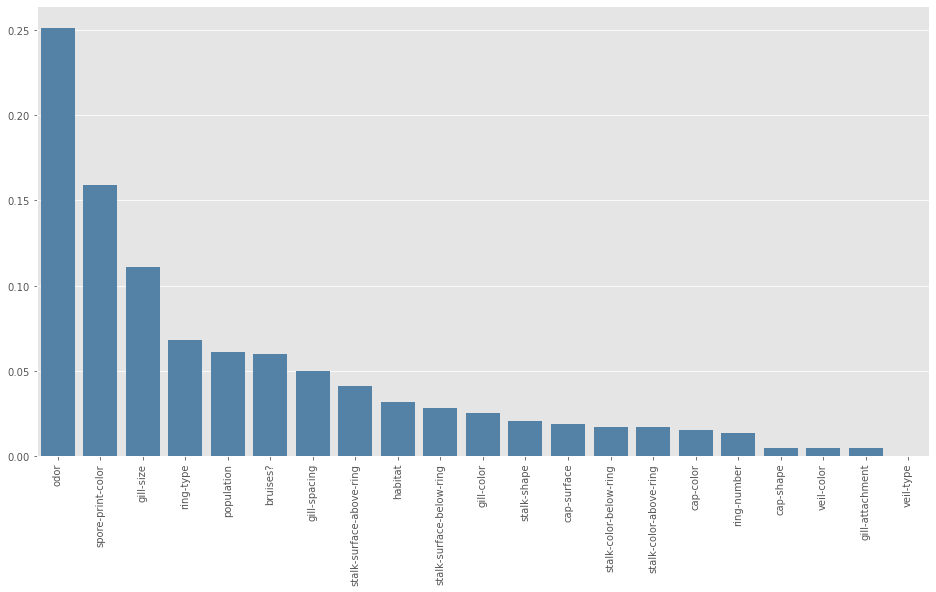

In [46]:
dims = (16, 8.27)

fig, ax = plt.subplots(figsize=dims)
sns.barplot(x=forest_importances.index, y=forest_importances.values, palette = ['steelblue'])
ax.tick_params(axis='x', rotation=90)
plt.show()

In [48]:
# export for ploting in excel
forest_importances.to_csv('RF_feature_importances')

In [49]:
from sklearn.linear_model import LogisticRegressionCV

In [50]:
lr_cv = LogisticRegressionCV(Cs= 10, cv = 5, scoring = 'roc_auc', max_iter = 1000)


In [51]:
lr_cv.fit(X_train, y_train.values.ravel())

LogisticRegressionCV(cv=5, max_iter=1000, scoring='roc_auc')

In [52]:
lr_cv.score(X_train,y_train)

0.9765412243656892

In [53]:
# Try logistic with only 2 features
feat2 = ['odor', 'gill-size']
lr_feat2 = LogisticRegression(max_iter = 1000)
lr_feat2.fit(X_train.loc[:,feat2], y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [55]:
th = .5
y_feat2_pred = lr_feat2.predict(X_test.loc[:,feat2])
y_feat2_pred_prob =(lr_feat2.predict_proba(X_test.loc[:,feat2])[:,1] > th)

print(y_feat2_pred)
print(y_feat2_pred_prob)

[0 1 0 ... 0 1 0]
[False  True False ... False  True False]


In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_feat2_pred)
print(confusion_matrix)

[[803  62]
 [335 425]]


In [57]:
print(classification_report(y_test, y_feat2_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       865
           1       0.87      0.56      0.68       760

    accuracy                           0.76      1625
   macro avg       0.79      0.74      0.74      1625
weighted avg       0.78      0.76      0.75      1625



In [58]:
# Now try adding one more feature one at a time
other_features= list(set(X_train.columns.tolist()).difference(feat2))
feat2

['odor', 'gill-size']

In [59]:
 feat2

['odor', 'gill-size']

In [60]:

for feat in other_features:
    print(feat)
    print('-----------------------')
    feat_set = feat2.copy()
    feat_set.append(feat)
    # print(feat_set)
    lr_feat_set= LogisticRegression(max_iter = 1000)
    lr_feat_set.fit(X_train.loc[:,feat_set], y_train.values.ravel())
    
    th = .5
    y_feat_set_pred = lr_feat_set.predict(X_test.loc[:,feat_set])
    y_feat_set_pred_prob =(lr_feat_set.predict_proba(X_test.loc[:,feat_set])[:,1] > th)
    print(classification_report(y_test, y_feat_set_pred))

cap-shape
-----------------------
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       865
           1       0.77      0.56      0.65       760

    accuracy                           0.72      1625
   macro avg       0.73      0.71      0.71      1625
weighted avg       0.73      0.72      0.71      1625

bruises?
-----------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       865
           1       0.92      0.91      0.91       760

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

gill-color
-----------------------
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       865
           1       0.76      0.56      0.65       760

    accuracy                           0.71      1625
   macro avg       0.72   

### Decided I need to try all possible combinations of features. Made a design decision to pick 3-feature combiantions

In [61]:
from itertools import combinations
import time

In [62]:
metrics = ['feature_comb3', 'f1_score', 'poison_recall',
                                  'poison_precision']


features = X_train.columns.to_list()
comb3 = combinations(features, 3)
count = 0

feature_comb3_list =[]
f1_list = []
prec_list =[]
recall_list = []


start = time.time()
for i in comb3:
    

    metrics_list = []
    
    
    feat_set = i
    lr_feat_set= LogisticRegression(max_iter = 1000)
    lr_feat_set.fit(X_train.loc[:,feat_set], y_train.values.ravel())
    
    th = .5
    y_feat_set_pred = lr_feat_set.predict(X_test.loc[:,feat_set])
    
    report = classification_report(y_test, y_feat_set_pred, output_dict=True)

    
    feature_comb3_list.append(feat_set)
    f1_list.append(report['macro avg']['f1-score'])
    prec_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])

    
    print(i)
    count += 1
end = time.time()

('cap-shape', 'cap-surface', 'cap-color')
('cap-shape', 'cap-surface', 'bruises?')
('cap-shape', 'cap-surface', 'odor')
('cap-shape', 'cap-surface', 'gill-attachment')
('cap-shape', 'cap-surface', 'gill-spacing')
('cap-shape', 'cap-surface', 'gill-size')
('cap-shape', 'cap-surface', 'gill-color')
('cap-shape', 'cap-surface', 'stalk-shape')
('cap-shape', 'cap-surface', 'stalk-surface-above-ring')
('cap-shape', 'cap-surface', 'stalk-surface-below-ring')
('cap-shape', 'cap-surface', 'stalk-color-above-ring')
('cap-shape', 'cap-surface', 'stalk-color-below-ring')
('cap-shape', 'cap-surface', 'veil-type')
('cap-shape', 'cap-surface', 'veil-color')
('cap-shape', 'cap-surface', 'ring-number')
('cap-shape', 'cap-surface', 'ring-type')
('cap-shape', 'cap-surface', 'spore-print-color')
('cap-shape', 'cap-surface', 'population')
('cap-shape', 'cap-surface', 'habitat')
('cap-shape', 'cap-color', 'bruises?')
('cap-shape', 'cap-color', 'odor')
('cap-shape', 'cap-color', 'gill-attachment')
('cap-shap

In [64]:
print(end - start)

27.06692886352539


In [65]:
count

1330

In [66]:
df_comb3_logis = pd.DataFrame(columns =metrics)

df_comb3_logis['feature_comb3'] = feature_comb3_list
df_comb3_logis['f1_score']= f1_list
df_comb3_logis['poison_recall'] = recall_list
df_comb3_logis['poison_precision'] = prec_list

### Logistic model with all 3-feature combinations results

In [67]:
df_comb3_logis.sort_values('f1_score', axis = 0, inplace = True, ascending=False )
df_comb3_logis

,feature_comb3,f1_score,poison_recall,poison_precision
877,"(gill-spacing, gill-size, stalk-surface-above-...",0.945544,0.931579,0.951613
866,"(gill-attachment, ring-number, spore-print-color)",0.920940,0.871053,0.958032
1311,"(veil-color, ring-number, spore-print-color)",0.920940,0.871053,0.958032
516,"(bruises?, odor, gill-size)",0.920250,0.911842,0.917881
878,"(gill-spacing, gill-size, stalk-surface-below-...",0.919810,0.931579,0.900763
...,...,...,...,...
1299,"(veil-type, veil-color, habitat)",0.470970,0.361842,0.435127
859,"(gill-attachment, veil-type, habitat)",0.470970,0.361842,0.435127
755,"(odor, veil-color, ring-number)",0.403338,0.757895,0.445131
660,"(odor, gill-attachment, ring-number)",0.401978,0.753947,0.443842


In [68]:
print(df_comb3_logis.loc[877, :][0])

('gill-spacing', 'gill-size', 'stalk-surface-above-ring')


In [69]:
metrics = ['feature_comb3', 'f1_score', 'poison_recall',
                                  'poison_precision']

features = X_train.columns.to_list()
comb3 = combinations(features, 3)
count = 0

feature_comb3_list =[]
f1_list = []
prec_list =[]
recall_list = []

start = time.time()
for i in comb3:
    
    # dict_feat = dict.fromkeys(metrics)
    metrics_list = []
    
    
    feat_set = i
    rf = RandomForestClassifier(n_estimators=100, random_state = 42)
    rf.fit(X_train.loc[:,feat_set],y_train.values.ravel())
    
    y_feat_set_pred = rf.predict(X_test.loc[:,feat_set])
    
    report = classification_report(y_test, y_feat_set_pred, output_dict=True)
   
    
    feature_comb3_list.append(feat_set)
    f1_list.append(report['macro avg']['f1-score'])
    prec_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])

    
    print(i)
    count += 1

end= time.time()

('cap-shape', 'cap-surface', 'cap-color')
('cap-shape', 'cap-surface', 'bruises?')
('cap-shape', 'cap-surface', 'odor')
('cap-shape', 'cap-surface', 'gill-attachment')
('cap-shape', 'cap-surface', 'gill-spacing')
('cap-shape', 'cap-surface', 'gill-size')
('cap-shape', 'cap-surface', 'gill-color')
('cap-shape', 'cap-surface', 'stalk-shape')
('cap-shape', 'cap-surface', 'stalk-surface-above-ring')
('cap-shape', 'cap-surface', 'stalk-surface-below-ring')
('cap-shape', 'cap-surface', 'stalk-color-above-ring')
('cap-shape', 'cap-surface', 'stalk-color-below-ring')
('cap-shape', 'cap-surface', 'veil-type')
('cap-shape', 'cap-surface', 'veil-color')
('cap-shape', 'cap-surface', 'ring-number')
('cap-shape', 'cap-surface', 'ring-type')
('cap-shape', 'cap-surface', 'spore-print-color')
('cap-shape', 'cap-surface', 'population')
('cap-shape', 'cap-surface', 'habitat')
('cap-shape', 'cap-color', 'bruises?')
('cap-shape', 'cap-color', 'odor')
('cap-shape', 'cap-color', 'gill-attachment')
('cap-shap

In [70]:
print((end - start)/60)

4.042896234989167


In [71]:
count

1330

In [72]:
df_comb3_rf = pd.DataFrame(columns =metrics)

df_comb3_rf['feature_comb3'] = feature_comb3_list
df_comb3_rf['f1_score']= f1_list
df_comb3_rf['poison_recall'] = recall_list
df_comb3_rf['poison_precision'] = prec_list

### RF model with all 3-feature combinations results

In [73]:
df_comb3_rf.sort_values('f1_score', axis = 0, inplace = True, ascending = False )
df_comb3_rf

,feature_comb3,f1_score,poison_recall,poison_precision
731,"(odor, stalk-surface-below-ring, spore-print-c...",0.996910,0.997368,0.996058
768,"(odor, spore-print-color, habitat)",0.996909,0.994737,0.998679
746,"(odor, stalk-color-below-ring, spore-print-color)",0.996909,0.993421,1.000000
391,"(cap-color, odor, spore-print-color)",0.996290,0.992105,1.000000
748,"(odor, stalk-color-below-ring, habitat)",0.995672,0.992105,0.998675
...,...,...,...,...
78,"(cap-shape, gill-attachment, veil-type)",0.565347,0.559211,0.534591
1295,"(veil-type, veil-color, ring-number)",0.480022,0.985526,0.510566
860,"(gill-attachment, veil-color, ring-number)",0.480022,0.985526,0.510566
855,"(gill-attachment, veil-type, ring-number)",0.480022,0.985526,0.510566


In [74]:
print(df_comb3_rf.loc[731, :][0])

('odor', 'stalk-surface-below-ring', 'spore-print-color')


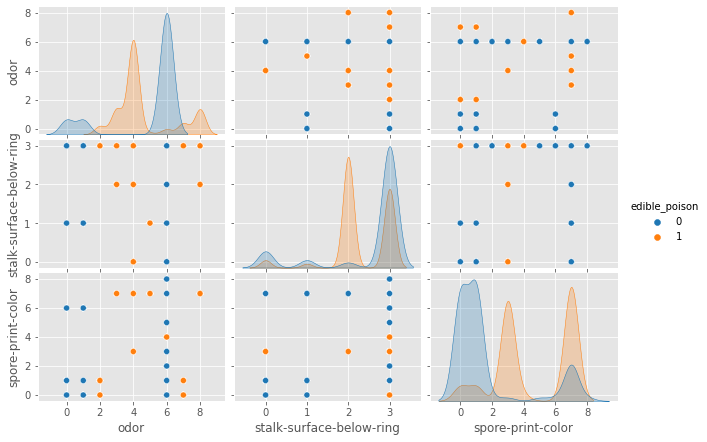

In [78]:
g = sns.pairplot(df_ordinal, x_vars = ['odor','stalk-surface-below-ring' ,'spore-print-color'],
             y_vars=['odor','stalk-surface-below-ring' ,'spore-print-color'],
                                             hue ="edible_poison", 
                                             hue_order = [0, 1],height=3, palette = 'tab10')
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

plt.savefig('rf_best.svg')
plt.show()

In [92]:
print('odor                 ', labels_dict['odor'])
print('stalk-surface-below-ring                    ', labels_dict['stalk-surface-below-ring'])
print('spore-print-color     ', labels_dict['spore-print-color'])

odor                  {'ALMOND': 0, 'ANISE': 1, 'CREOSOTE': 2, 'FISHY': 3, 'FOUL': 4, 'MUSTY': 5, 'NONE': 6, 'PUNGENT': 7, 'SPICY': 8}
stalk-surface-below-ring                     {'FIBROUS': 0, 'SCALY': 1, 'SILKY': 2, 'SMOOTH': 3}
spore-print-color      {'BLACK': 0, 'BROWN': 1, 'BUFF': 2, 'CHOCOLATE': 3, 'GREEN': 4, 'ORANGE': 5, 'PURPLE': 6, 'WHITE': 7, 'YELLOW': 8}


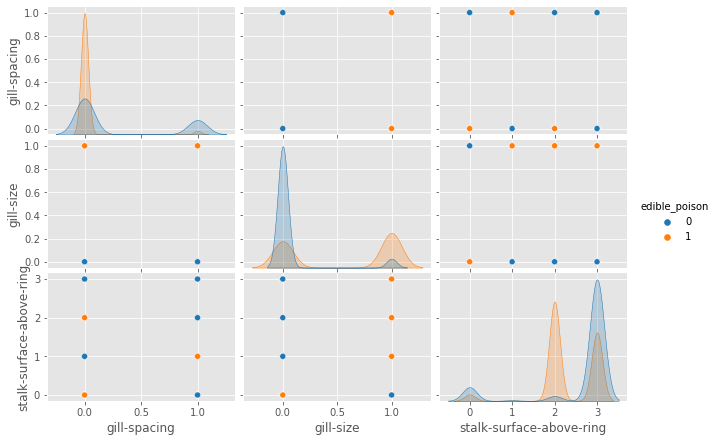

In [79]:
g= sns.pairplot(df_ordinal, x_vars = ['gill-spacing', 'gill-size', 'stalk-surface-above-ring'],
             y_vars=['gill-spacing', 'gill-size', 'stalk-surface-above-ring'],
                                             hue ="edible_poison", 
                                             hue_order = [0, 1],height=3, palette = 'tab10')
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

plt.savefig('log_best.svg')
plt.show()

In [91]:

print('gill-spacing                 ', labels_dict['gill-spacing'])
print('gill-size                    ', labels_dict['gill-size'])
print('stalk-surface-above-ring     ', labels_dict['stalk-surface-above-ring'])

gill-spacing                  {'CLOSE': 0, 'CROWDED': 1}
gill-size                     {'BROAD': 0, 'NARROW': 1}
stalk-surface-above-ring      {'FIBROUS': 0, 'SCALY': 1, 'SILKY': 2, 'SMOOTH': 3}


In [113]:
rf_sample = RandomForestClassifier(n_estimators=100, random_state = 42)
model = rf_sample.fit(X_train.loc[:,['odor', 'stalk-surface-below-ring', 'spore-print-color']],y_train.values.ravel())


# list_features =['ALMOND', 'SMOOTH', 'PURPLE']
list_features =['FOUL', 'SMOOTH', 'BROWN']

list_feature_to_label = [labels_dict['odor'][list_features[0]],
                         labels_dict['stalk-surface-below-ring'][list_features[1]],
                        labels_dict['spore-print-color'][list_features[2]]]



df_sample = pd.DataFrame(columns=['odor', 'stalk-surface-below-ring', 'spore-print-color'])
df_sample.loc[0] = list_feature_to_label
df_sample


y_feat_set_pred = model.predict(df_sample)
print(y_feat_set_pred)

[1]


## RUNNING TIME TRIALS FOR 2, 3, AND 4 BEST FEATURES

In [98]:
metrics = ['feature_comb3', 'f1_score', 'poison_recall',
                                  'poison_precision']

features = X_train.columns.to_list()
comb4 = combinations(features, 2)
count = 0

feature_comb3_list =[]
f1_list = []
prec_list =[]
recall_list = []

start = time.time()
for i in comb4:
    
    # dict_feat = dict.fromkeys(metrics)
    metrics_list = []
    
    
    feat_set = i
    rf = RandomForestClassifier(n_estimators=100, random_state = 42)
    rf.fit(X_train.loc[:,feat_set],y_train.values.ravel())
    
    y_feat_set_pred = rf.predict(X_test.loc[:,feat_set])
    
    report = classification_report(y_test, y_feat_set_pred, output_dict=True)
   
    
    feature_comb3_list.append(feat_set)
    f1_list.append(report['macro avg']['f1-score'])
    prec_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])

    
    print(i)
    count += 1

end= time.time()

('cap-shape', 'cap-surface')
('cap-shape', 'cap-color')
('cap-shape', 'bruises?')
('cap-shape', 'odor')
('cap-shape', 'gill-attachment')
('cap-shape', 'gill-spacing')
('cap-shape', 'gill-size')
('cap-shape', 'gill-color')
('cap-shape', 'stalk-shape')
('cap-shape', 'stalk-surface-above-ring')
('cap-shape', 'stalk-surface-below-ring')
('cap-shape', 'stalk-color-above-ring')
('cap-shape', 'stalk-color-below-ring')
('cap-shape', 'veil-type')
('cap-shape', 'veil-color')
('cap-shape', 'ring-number')
('cap-shape', 'ring-type')
('cap-shape', 'spore-print-color')
('cap-shape', 'population')
('cap-shape', 'habitat')
('cap-surface', 'cap-color')
('cap-surface', 'bruises?')
('cap-surface', 'odor')
('cap-surface', 'gill-attachment')
('cap-surface', 'gill-spacing')
('cap-surface', 'gill-size')
('cap-surface', 'gill-color')
('cap-surface', 'stalk-shape')
('cap-surface', 'stalk-surface-above-ring')
('cap-surface', 'stalk-surface-below-ring')
('cap-surface', 'stalk-color-above-ring')
('cap-surface', 's

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('gill-attachment', 'veil-color')
('gill-attachment', 'ring-number')
('gill-attachment', 'ring-type')
('gill-attachment', 'spore-print-color')
('gill-attachment', 'population')
('gill-attachment', 'habitat')
('gill-spacing', 'gill-size')
('gill-spacing', 'gill-color')
('gill-spacing', 'stalk-shape')
('gill-spacing', 'stalk-surface-above-ring')
('gill-spacing', 'stalk-surface-below-ring')
('gill-spacing', 'stalk-color-above-ring')
('gill-spacing', 'stalk-color-below-ring')
('gill-spacing', 'veil-type')
('gill-spacing', 'veil-color')
('gill-spacing', 'ring-number')
('gill-spacing', 'ring-type')
('gill-spacing', 'spore-print-color')
('gill-spacing', 'population')
('gill-spacing', 'habitat')
('gill-size', 'gill-color')
('gill-size', 'stalk-shape')
('gill-size', 'stalk-surface-above-ring')
('gill-size', 'stalk-surface-below-ring')
('gill-size', 'stalk-color-above-ring')
('gill-size', 'stalk-color-below-ring')
('gill-size', 'veil-type')
('gill-size', 'veil-color')
('gill-size', 'ring-number'

In [99]:
print((end - start)/60)

0.5694978833198547


In [100]:
count

210

In [106]:
metrics = ['feature_comb3', 'f1_score', 'poison_recall',
                                  'poison_precision']


features = X_train.columns.to_list()
comb3 = combinations(features, 3)
count = 0

feature_comb3_list =[]
f1_list = []
prec_list =[]
recall_list = []


start = time.time()
for i in comb3:
    

    metrics_list = []
    
    
    feat_set = i
    lr_feat_set= LogisticRegression(max_iter = 1000)
    lr_feat_set.fit(X_train.loc[:,feat_set], y_train.values.ravel())
    
    th = .5
    y_feat_set_pred = lr_feat_set.predict(X_test.loc[:,feat_set])
    
    report = classification_report(y_test, y_feat_set_pred, output_dict=True)

    
    feature_comb3_list.append(feat_set)
    f1_list.append(report['macro avg']['f1-score'])
    prec_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])

    
    print(i)
    count += 1
end = time.time()

('cap-shape', 'cap-surface', 'cap-color')
('cap-shape', 'cap-surface', 'bruises?')
('cap-shape', 'cap-surface', 'odor')
('cap-shape', 'cap-surface', 'gill-attachment')
('cap-shape', 'cap-surface', 'gill-spacing')
('cap-shape', 'cap-surface', 'gill-size')
('cap-shape', 'cap-surface', 'gill-color')
('cap-shape', 'cap-surface', 'stalk-shape')
('cap-shape', 'cap-surface', 'stalk-surface-above-ring')
('cap-shape', 'cap-surface', 'stalk-surface-below-ring')
('cap-shape', 'cap-surface', 'stalk-color-above-ring')
('cap-shape', 'cap-surface', 'stalk-color-below-ring')
('cap-shape', 'cap-surface', 'veil-type')
('cap-shape', 'cap-surface', 'veil-color')
('cap-shape', 'cap-surface', 'ring-number')
('cap-shape', 'cap-surface', 'ring-type')
('cap-shape', 'cap-surface', 'spore-print-color')
('cap-shape', 'cap-surface', 'population')
('cap-shape', 'cap-surface', 'habitat')
('cap-shape', 'cap-color', 'bruises?')
('cap-shape', 'cap-color', 'odor')
('cap-shape', 'cap-color', 'gill-attachment')
('cap-shap

In [110]:
print((end - start)/60)


0.42971083720525105
